# __Finance 6470 Lectures Notes: Chapter 12 - The Black-Scholes Formula__

<br>

Finance 6470: Derivatives Markets <br>
Tyler J. Brough <br>
Last Updated: April 16, 2019 <br>
<br>
<br>

## __The Black-Scholes Formula__

### The BSM Call Price Formula

The Black-Scholes formula for a European call option is given as follows:

<br>

$$
C(S,K,\sigma,r,T,\delta) = Se^{-\delta T}N(d_{1}) - Ke^{-rT}N(d_{2})
$$

<br>

where:

<br>

$$
\begin{align}
d_{1} &= \frac{\ln{(S/K)} + (r - \delta + \frac{1}{2} \sigma^{2}) T}{\sigma \sqrt{T}} \\
d_{2} &= d_{1} - \sigma \sqrt{T}
\end{align}
$$

<br>

and $N(\cdot)$ is the standard normal cumulative distribution function (cdf).

<br>

__NB:__ Notice that is corresponds basically with the no-arbitrate form of the binomial option pricing model of $C = \Delta S + B$ by setting $\Delta = e^{-\delta T} N(d_{1})$ and $B = -Ke^{-rT}N(d_{2})$. The idea is basically the same. 


<br>

__NB:__ The BSM formula is the _solution_ to the BSM (differential) equation. The BSM equation will be discussed in later lectures.

<br>

Let's see how to instantiate this formula in code:

In [31]:
import numpy as np
import pandas as pd
from scipy.stats import norm
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [20, 10]

In [32]:
def bsmCall(S, K, v, r, t, q):
    d1 = ((np.log(S/K) + (r - q + 0.5 * v * v)*t) / (v * np.sqrt(t)))
    d2 = d1 - v * np.sqrt(t)
    prc = S * np.exp(-q * t) * norm.cdf(d1) - K * np.exp(-r * t) * norm.cdf(d2)
    
    return prc

In [33]:
## Example 12.1 on pp. 351 of McDonald 3rd Edition
S = 41.0
K = 40.0
v = 0.30
r = 0.08
t = 0.25
q = 0.0

In [34]:
callPrc = bsmCall(S, K, v, r, t, q)
print(f"The Value of the European Call Option is: {callPrc : 0.3f}")

The Value of the European Call Option is:  3.399


<br>

As you can see, using the BSM formula is easy. It's just a matter of plug-and-chug. 

<br>

### The BSM Put Price Formula

The above BSM formula is for a European call option. What if you want to price a put? Well, the first obvious thing to do would be to use put-call parity:

<br>

$$
P(S,K,\sigma,r,T,\delta) = C(S,K,\sigma,r,T,\delta) + Ke^{-rT} - Se^{-\delta T}
$$

<br>

But one can also derive an explicit formula for put options as follows:

<br>

$$
P(S,K,\sigma,r,T,\delta) = Ke^{-rT} N(-d_{2}) - S e^{-\delta T} N(-d_{1})
$$

<br>

In [35]:
def bsmPut(S,K,v,r,t,q):
    d1 = ((np.log(S/K) + (r - q + 0.5 * v * v)*t) / (v * np.sqrt(t)))
    d2 = d1 - v * np.sqrt(t)
    prc = K * np.exp(-r * t) * norm.cdf(-d2) - S * np.exp(-q * t) * norm.cdf(-d1)
    
    return prc

In [36]:
## See Example 12.2 on pp. 352 of McDonald 3rd
putPrc = bsmPut(S,K,v,r,t,q)
print(f"The Value of the European Put Option is: {putPrc : 0.2f}")

The Value of the European Put Option is:  1.61


### BSM Model Assumptions

<br>

Assumptions about the distribution of stock price include the following:

* Stock prices follow Geometric Brownian Motion (GBM).

* Continously compounded returns on the stock are normally distributed and independent over time. (No "thick tails" or "jumps").

* The volatility of continously compounded returns is known and constant.

* Future dividends are known, either as a dollar amount or as a fixed dividend yield.

<br>

Assumptions about the economic environment include the following:

* The risk-free rate is known and constant. 

* There are no transaction costs or taxes.

* It is possible to short-sell constlessly and to borrow at the risk-free rate.

## __The Option Greeks__

The so-called _Greeks_ are formulas that express the change in the option price when an input to the formula changes, taking every other input as given and fixed. The most important use of the Greeks is to understand the risk exposure of the option.

<br>

### Definition of the Greeks

<br>

* __Delta__ (__$\Delta$__) measures the option price change when the stock price increases by $\$1$.

* __Gamma__ (__$\Gamma$__) measures the change in delta when the stock price increases by $\$1$.

* __Vega__ measures the change in the option price when there is an increase in volatility of $1$ percentage point (in annualized volatility). (_NB:_ _vega_ is not a Greek letter, but people liked that it started with a _"v"_ for _volatility_.)

* __Theta__ (__$\theta$__) measures the change in the option price when there is a ___decrease___ in the time to maturity of $1$ day. 

* __Rho__ (__$rho$__) measures the change in the option price when there is an increase in the interest rate of $1$ percentage point (100 basis points - annualized)

* __Psi__ (__$Psi$__) measures the change in the option price when there is an increase in the continous dividend yield of $1$ percentage point (100 basis points - annualized)

<br>

For definitions the Option Greeks see Appendix 12.B of Chapter 12 of McDonald 3rd.

<br>

<br>

Here we will implement the BSM $\Delta$ formula in Python:

<br>

In [1]:
def bsmDelta(S, K, v, r, t, q):
    d1 = ((np.log(S/K) + (r - q + 0.5 * v * v)*t) / (v * np.sqrt(t)))
    d2 = d1 - v * np.sqrt(t)
    delta = np.exp(-q * t) * norm.cdf(d1) 
    
    return delta

In [38]:
## See Table 13.1 of McDonald 3rd on pp. 383
S = 40.0
K = 40.0
v = 0.30
r = 0.08
q = 0.0
tau = 91.0/365.0

callDelta = bsmDelta(S, K, v, r, tau, q)
print(f"The Delta for the European Call Option is: {callDelta : 0.4f}")

The Delta for the European Call Option is:  0.5824


<br>

Let's look at $\Delta$ for a range of prices.

<br>

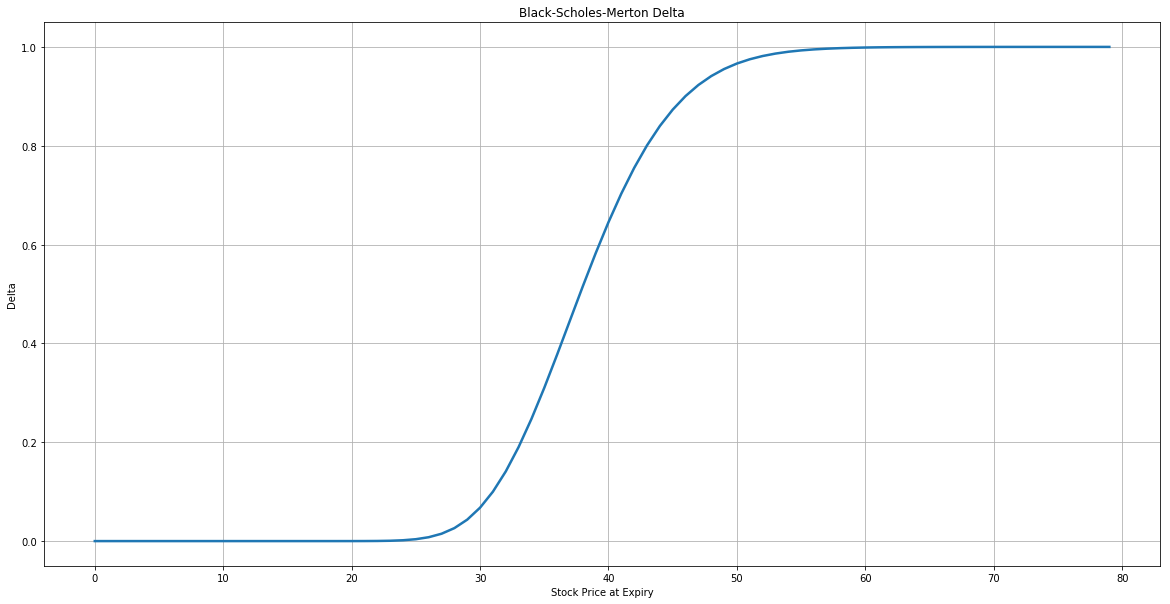

In [39]:
## Generate a range of terminal stock prices
spot = np.arange(start=1.0, stop=2 * K + 1.0, step=1.0)

## Note: the formula is vectorized
callDelta = bsmDelta(spot, K, v, r, tau, q)

## plot the simulated returns path
fig, ax = plt.subplots()
#ax.plot_date(r, linestyle='--')
ax.grid(True)
plt.title("Black-Scholes-Merton Delta")
plt.ylabel("Delta")
plt.xlabel("Stock Price at Expiry")
plt.plot(callDelta, linewidth=2.5)
plt.show()

<br>

* __Q:__ How can you describe this pattern?

* __Q:__ What intuition can you develope for this shape for Delta?

<br>

## __Simulating Price Paths via Geometric Brownian Motion__

It is important to understand how to simulate from the GBM price process to build intuition for the BSM formula, as well as for Monte Carlo option pricing and hedging techniques. In addition, 
simulation can help us develop basic intuition about how the BSM equation leads to the BSM formula. See Figlewski (1989). 

<br>

The GBM price process between time $t-1$ and $t$ is given as follows (see pp. McDonald Chapters 18 and 19):

<br>

$$
S_{t} = S_{t-1} e^{(\alpha - \delta - \frac{1}{2} \sigma^{2})\Delta t + \sigma \sqrt{\Delta t} Z}
$$

where:

* __$e$__ is the base of the _natural exponential function_

* __$\alpha$__ is the annualized mean return of the underlying stock's continously compounded return (the objective or real-world distribution)

* __$\sigma$__ is the annualized standard deviation of the underlying stock's continously compounded return (the objective or real-world distribution)

* __$\delta$__ is the annualized dividend yield of the underlying stock

* __$\Delta t$__ is the time duration of the time step (annualized) between times $t-1$ and $t$

* __$Z$__ is a draw from a standard normal distribution

<br>

We need values of these parameters to begin simulating a path. But with these initial conditions we can simulate a path as follows:

<br>

In [40]:
S = 41.0       # spot price
a = 0.15       # risky return
q = 0.0        # dividend yield
v = 0.30       # annual volatility
dt = 1.0/253.0 # time step (a single day)

In [41]:
N = 253
z = np.random.normal(size=N)
nudt = (a - q - 0.5 * v * v) * dt
sigdt = (v * np.sqrt(dt))

path = np.zeros(N)
path[0] = S

for t in range(1,N):
    path[t] = path[t-1] * np.exp(nudt + sigdt * z[t])

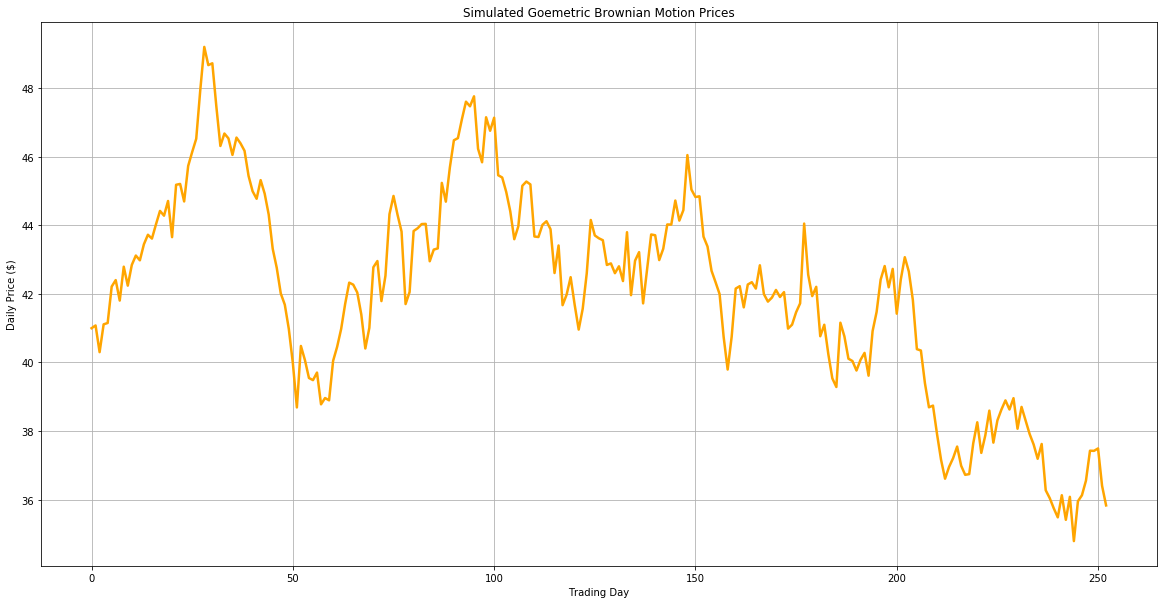

In [42]:
## plot the simulated returns path
fig, ax = plt.subplots()
#ax.plot_date(r, linestyle='--')
ax.grid(True)
plt.title("Simulated Goemetric Brownian Motion Prices")
plt.ylabel("Daily Price ($)")
plt.xlabel("Trading Day")
plt.plot(path, linewidth=2.5, color="orange")
plt.show()

<br>

We can also write a function `AssetPaths` that will simulate a given number of paths each of a given length as follows:

<br>

In [43]:
def AssetPaths(spot, mu, sigma, expiry, div, nreps, nsteps):
    paths = np.empty((nreps, nsteps + 1))
    h = expiry / nsteps
    paths[:, 0] = spot
    mudt = (mu - div - 0.5 * sigma * sigma) * h
    sigmadt = sigma * np.sqrt(h)
    
    for t in range(1, nsteps + 1):
        z = np.random.normal(size=nreps)
        paths[:, t] = paths[:, t-1] * np.exp(mudt + sigmadt * z)

    return paths

<br>

It will help to have a function for price-path plotting (see [here for documentation](https://matplotlib.org/2.1.1/api/_as_gen/matplotlib.pyplot.plot.html)):

<br>

In [44]:
def plotPricePath(path):
    nsteps = path.shape[0]
    plt.plot(path, 'o', color="green", linewidth = 2.5)
    plt.title("Simulated Geometric Brownian Price Path")
    plt.xlabel("Time Steps")
    plt.ylabel("Stock Price ($)")
    plt.xlim((0, nsteps))
    plt.grid(True)
    plt.show()

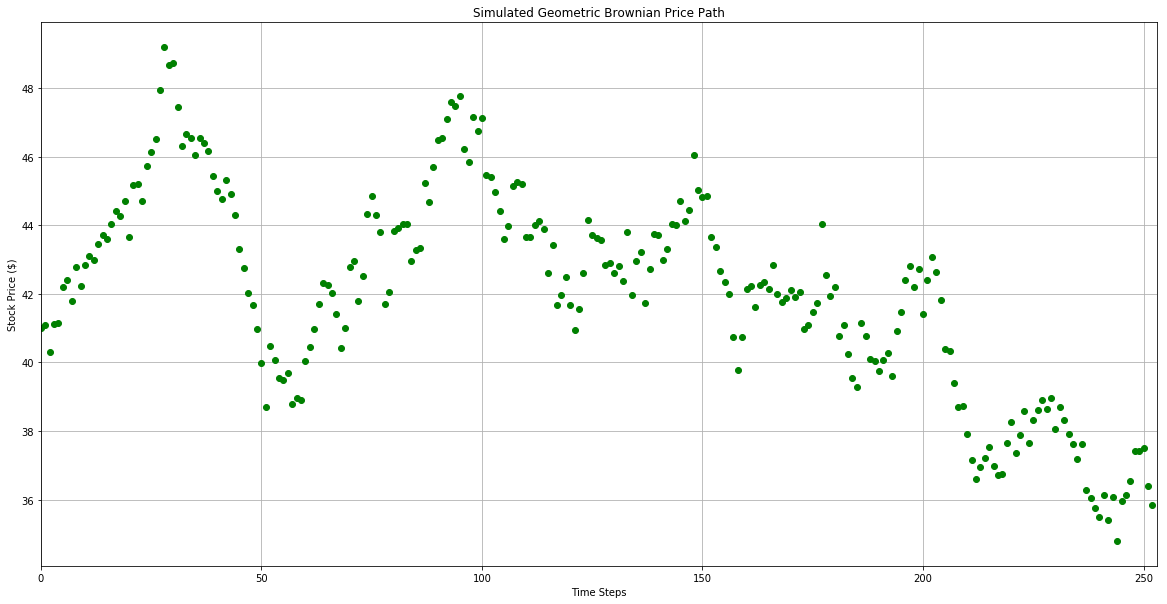

In [45]:
plotPricePath(path)

### Simulating BSM Delta via GBM

<br>

We can use out GBM simulator to also simulate derivatives, like $\Delta$.

<br>

Given that our `bsmDelta` function above is vectorized, we can simply input a path to get a path-wise calculation of $\Delta$!

<br>

/home/brough/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in double_scalars
  


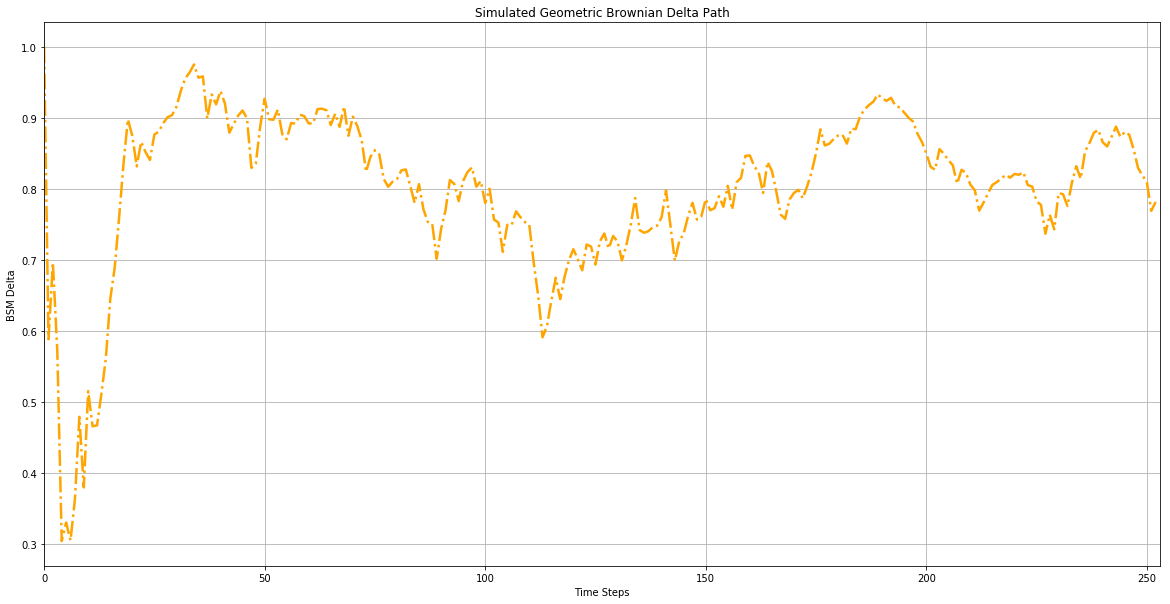

In [46]:
## Set up initial conditions
S = 41.0
K = 40.0
v = 0.30
mu = 0.08    # Real-world density
expiry = 1.0 
q = 0.0
nreps = 10
nsteps = 253

## Simulate from GBM and calculate deltas
paths = AssetPaths(S, mu, v, expiry, q, nreps, nsteps)

## Just one of the paths, but you get the idea!
deltas = np.zeros(nsteps)

for t in range(nsteps):
    tau = t/253.0
    deltas[t] = bsmDelta(paths[0, t], K, v, r, tau, q)

## We can repurpose plotPricePath
def plotDeltaPath(path):
    nsteps = path.shape[0]
    plt.plot(path, '-.', color="orange", linewidth = 2.5)
    plt.title("Simulated Geometric Brownian Delta Path")
    plt.xlabel("Time Steps")
    plt.ylabel("BSM Delta")
    plt.xlim((0, nsteps))
    plt.grid(True)
    plt.show()
    
plotDeltaPath(deltas)

In [127]:
df = pd.DataFrame({'PRC' : paths[0,1:], 'DELTA' : deltas})

In [128]:
df.head()

,PRC,DELTA
0,41.155672,1.000000
1,41.671275,0.937771
2,41.552662,0.941983
3,41.238931,0.887073
4,41.197202,0.805390


In [129]:
deltas[:10]

array([1.        , 0.93777057, 0.94198288, 0.88707274, 0.80538983,
       0.77572671, 0.67770687, 0.83948193, 0.90355439, 0.9547653 ])

In [130]:
df.tail()

,PRC,DELTA
248,56.939812,0.948748
249,56.485009,0.945182
250,55.616473,0.941954
251,55.269975,0.935499
252,54.206919,0.932649


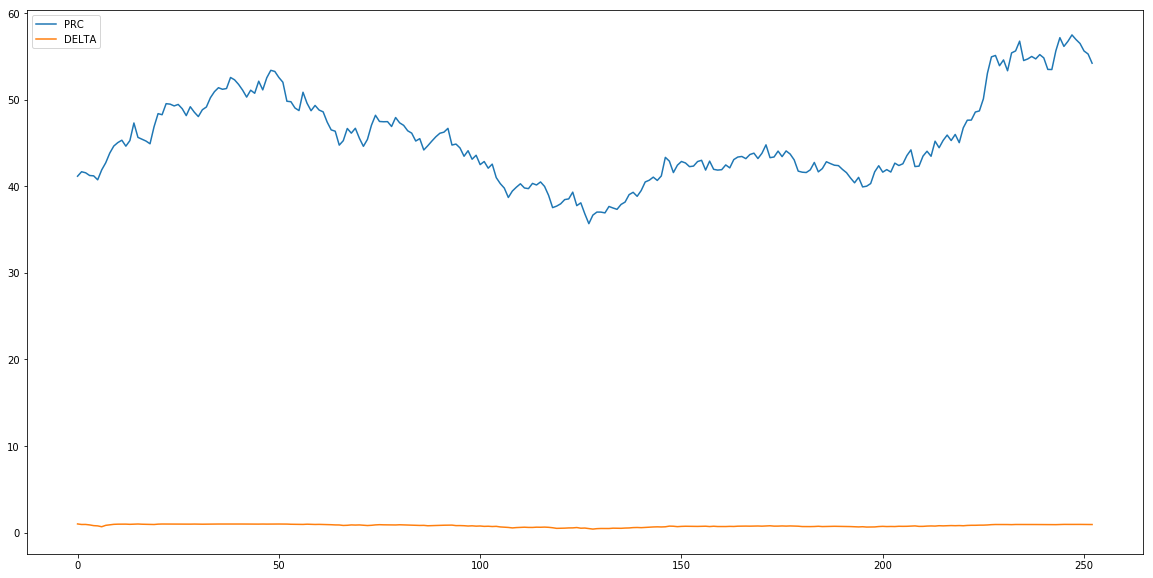

In [131]:
df.plot()

<br>

## __BSM Implied Volatilities__

To be completed ...